# SOAL 2: Exploratory Data Analysis (EDA) & Preprocessing
## 1. Pendahuluan
Notebook ini bertujuan untuk melakukan eksplorasi mendalam terhadap dataset AI4I 2020 Predictive Maintenance, mengidentifikasi pola kegagalan mesin, dan menyiapkan data yang bersih untuk tahap pemodelan.

In [ ]:
# import library dan load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
import os

# Pengaturan visualisasi
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Load Data
# Mengambil data dari folder '../data/raw/' (naik satu folder dari notebooks, masuk ke data/raw)
raw_data_path = '../data/raw/ai4i2020.csv'

# Cek apakah file ada
if os.path.exists(raw_data_path):
  print("File ditemukan, loading data...")
  df = pd.read_csv(raw_data_path)
else:
  print(f"Error: File tidak ditemukan di {raw_data_path}. Cek kembali lokasi file Anda.")

# tampilkan data sampel 5 baris pertama
df.head()

File ditemukan, loading data...


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


## 2. Analisis Kualitas Data
Langkah ini bertujuan untuk memeriksa integritas data, meliputi pemeriksaan missing values, duplikat, dan tipe data.

In [ ]:
print("INFO DATASET:")
display(df.info())

print("\nJUMLAH MISSING VALUES:")
display(df.isnull().sum())

print("\nJUMLAH DUPLIKAT:")
print(f"Data duplikat: {df.duplicated().sum()}")

print("\nSTATISTIK DESKRIPTIF:")
display(df.describe())

INFO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float6

None


JUMLAH MISSING VALUES:


UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


JUMLAH DUPLIKAT:
Data duplikat: 0

STATISTIK DESKRIPTIF:


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### Temuan Kualitas Data:
1.Integritas Data: Dataset sangat bersih. Tidak ditemukan missing values (Null) dan tidak ada baris duplikat.
2.Tipe Data: Tipe data sudah sesuai (Float/Int untuk sensor, Object untuk ID).
3.Fitur Tidak Relevan: Kolom UDI dan Product ID teridentifikasi sebagai identifier unik yang tidak memiliki nilai prediktif terhadap kerusakan mesin, sehingga akan dihapus pada tahap preprocessing.

## 3. Visualisasi 5 Insight Kunci
Berikut adalah 5 temuan visual terpenting yang menggambarkan karakteristik sistem dan pola kegagalan.

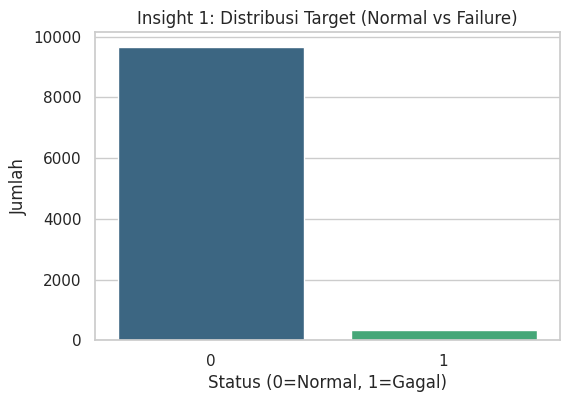

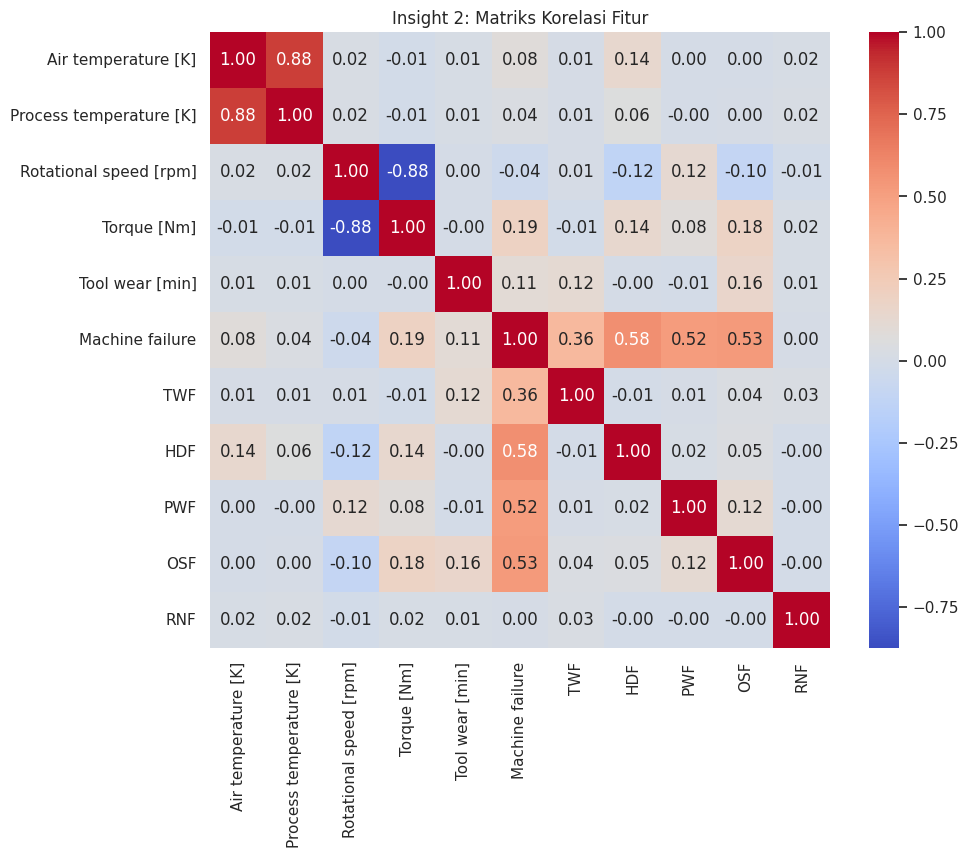

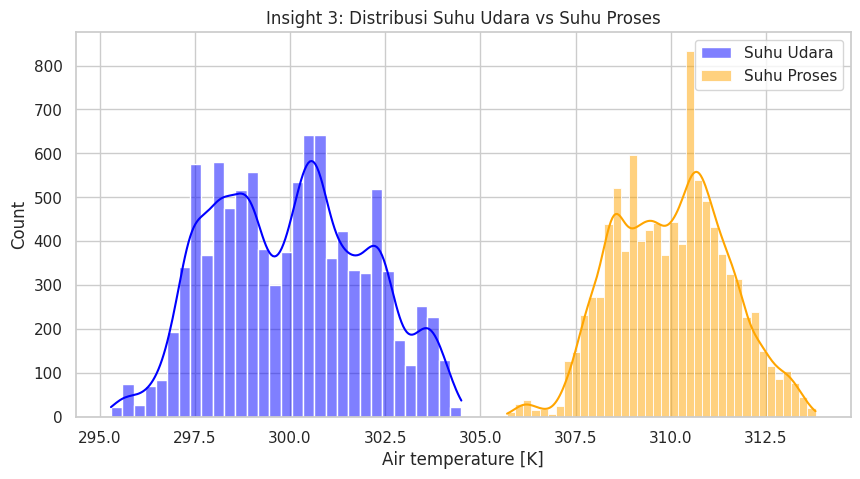

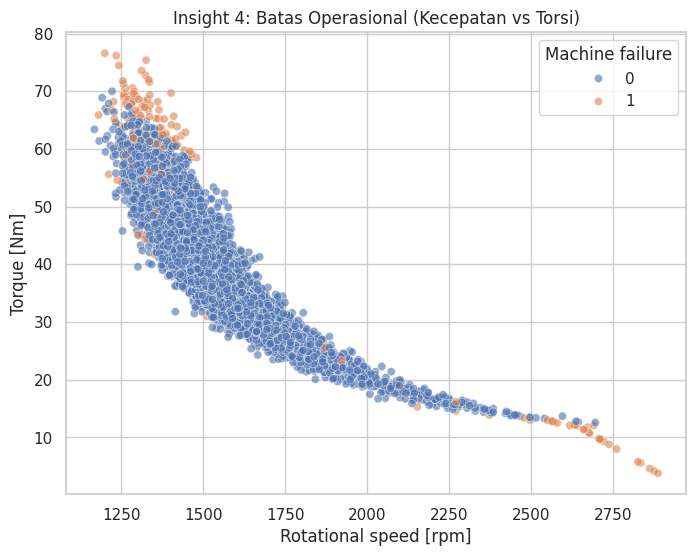

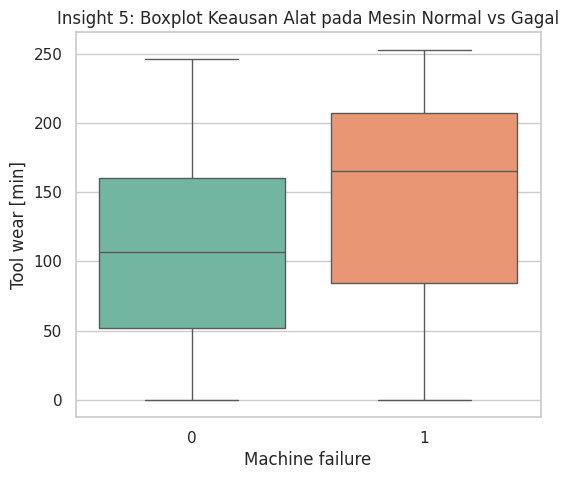

In [ ]:
# Insight 1: Ketidakseimbangan Target (Machine Failure)
plt.figure(figsize=(6, 4))
sns.countplot(
  x='Machine failure',
  data=df,
  hue='Machine failure',
  palette='viridis',
  legend=False
)
plt.title('Insight 1: Distribusi Target (Normal vs Failure)')
plt.xlabel('Status (0=Normal, 1=Gagal)')
plt.ylabel('Jumlah')
plt.show()

# Insight 2: Matriks Korelasi (Heatmap)
# Drop kolom non-numerik sementara untuk korelasi
corr_matrix = df.drop(['UDI', 'Product ID', 'Type'], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Insight 2: Matriks Korelasi Fitur')
plt.show()

# Insight 3: Distribusi Temperatur (Univariate)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Air temperature [K]', kde=True, color='blue', label='Suhu Udara')
sns.histplot(data=df, x='Process temperature [K]', kde=True, color='orange', label='Suhu Proses')
plt.title('Insight 3: Distribusi Suhu Udara vs Suhu Proses')
plt.legend()
plt.show()

# Insight 4: Hubungan Torsi dan Kecepatan Putar (Multivariate)**
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Rotational speed [rpm]', y='Torque [Nm]', hue='Machine failure', alpha=0.6)
plt.title('Insight 4: Batas Operasional (Kecepatan vs Torsi)')
plt.show()

# Insight 5: Pengaruh Keausan Alat (Tool Wear)
plt.figure(figsize=(6, 5))
sns.boxplot(
  x='Machine failure',
  y='Tool wear [min]',
  data=df,
  hue='Machine failure',
  palette='Set2',
  legend=False
)
plt.title('Insight 5: Boxplot Keausan Alat pada Mesin Normal vs Gagal')
plt.show()

### Interpretasi Insight:
1.Imbalance Class: Data target sangat tidak seimbang (mayoritas normal). Ini memerlukan strategi stratifikasi saat splitting data dan penggunaan metrik F1-Score nanti.
2.Korelasi Fisika: Terdapat korelasi positif kuat antara Suhu Udara dan Suhu Proses. Ini wajar, namun perlu diperhatikan untuk menghindari multikolinearitas.
3.Distribusi Normal: Data suhu terdistribusi normal (lonceng), memudahkan penggunaan model statistik standar.
4.Power Envelope: Plot Torsi vs RPM menunjukkan pola hiperbola. Kegagalan tersebar, namun ada konsentrasi di area *overstrain* (torsi tinggi atau speed tinggi).
5.Faktor Keausan: Boxplot menunjukkan mesin yang gagal cenderung memiliki waktu pakai alat (Tool wear) yang lebih lama dibanding mesin normal.

## 4. Feature Engineering & Preprocessing
Tahap ini meliputi pembersihan fitur, encoding data kategori, pembagian dataset, dan standarisasi nilai.

In [ ]:
# preprocessing data 
# A. Feature Selection & Cleaning
# Drop kolom ID (tidak prediktif) dan kolom target sekunder (leakage)
# TWF, HDF, dll adalah jenis kegagalan spesifik yang memberitahu jawaban Machine failure, jadi harus didrop untuk prediksi.
cols_to_drop = ['UDI', 'Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
df_clean = df.drop(columns=cols_to_drop)

# B. Encoding Variabel Kategorikal (Type)
# Kolom Type berisi L, M, H (Low, Medium, High). Ini Ordinal.
type_mapping = {'L': 0, 'M': 1, 'H': 2}
df_clean['Type'] = df_clean['Type'].map(type_mapping)

# C. Pemisahan Fitur (X) dan Target (y)
X = df_clean.drop('Machine failure', axis=1)
y = df_clean['Machine failure']

# D. Splitting Data (Train-Test Split)
# Menggunakan stratify=y karena data tidak seimbang (imbalanced)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# E. Scaling (Standarisasi)
# Scaling dilakukan SETELAH split untuk mencegah data leakage dari test set ke train set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape Training Data:", X_train_scaled.shape)
print("Shape Testing Data:", X_test_scaled.shape)

Shape Training Data: (8000, 6)
Shape Testing Data: (2000, 6)


### Justifikasi Teknik Preprocessing:
1.Penghapusan Fitur (Drop Columns): Kolom kegagalan spesifik (TWF, HDF, dll) dihapus untuk mencegah data leakage, karena kolom tersebut adalah indikator langsung dari target prediksi.
2.Ordinal Encoding: Kolom Type diubah menjadi angka (0,1,2) secara manual karena memiliki tingkatan (L, M, H), lebih efektif dibanding One-Hot Encoding.
3.Stratified Split: Menggunakan stratify=y sangat krusial karena dataset tidak seimbang (imbalanced). Ini menjaga proporsi kegagalan di data latih dan uji tetap sama.
4.Standard Scaler: Fitur fisik (Suhu, RPM, Torsi) memiliki satuan dan rentang angka yang berbeda jauh. Scaling menstandarkan data (mean=0, std=1) agar model machine learning tidak bias terhadap angka yang lebih besar.

In [16]:
# Definisi Path Sesuai Struktur Baru
processed_data_dir = '../data/processed'
models_dir = '../models'

# Buat folder jika belum ada
os.makedirs(processed_data_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)

# 1. Simpan Dataframe Bersih (CSV) ke data/processed
df_clean.to_csv(f'{processed_data_dir}/data_cleaned.csv', index=False)

# 2. Simpan Objek Preprocessing (Scaler & Split Data)
# Kita simpan X_train/test di data/processed agar mudah di-load
split_data = {
    'X_train': X_train_scaled,
    'X_test': X_test_scaled,
    'y_train': y_train,
    'y_test': y_test,
    'feature_names': X.columns.tolist()
}
joblib.dump(split_data, f'{processed_data_dir}/split_data.pkl')

# 3. Simpan Scaler (Pipeline Preprocessing) ke folder MODELS
# Sesuai permintaan: models/preprocessing.pkl
joblib.dump(scaler, f'{models_dir}/preprocessing.pkl')

print("✅ Data disimpan di: data/processed/")
print("✅ Preprocessing pipeline disimpan di: models/preprocessing.pkl")

✅ Data disimpan di: data/processed/
✅ Preprocessing pipeline disimpan di: models/preprocessing.pkl
